<a href="https://colab.research.google.com/github/ichiroDS/Economic_Inequality_and_Happiness/blob/main/Economic_Inequality_and_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# =====================================================
# 0. Clone GitHub repo and set working directory
#    (one-time setup for this notebook)
# =====================================================

import os, shutil

# If an old copy of the repo exists in the runtime, remove it
if os.path.exists("Economic_Inequality_and_Happiness"):
    shutil.rmtree("Economic_Inequality_and_Happiness")

# Clone my GitHub repository with all CSV files
!git clone https://github.com/ichiroDS/Economic_Inequality_and_Happiness.git

# Change working directory to the cloned repo
os.chdir("Economic_Inequality_and_Happiness")

print("Current working directory:", os.getcwd())
print("Files:", os.listdir())


Cloning into 'Economic_Inequality_and_Happiness'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 108.98 KiB | 3.03 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Current working directory: /content/Economic_Inequality_and_Happiness/Economic_Inequality_and_Happiness/Economic_Inequality_and_Happiness
Files: ['poverty_eurostat.tsv', 'Life_Eval..csv', 'gdp_wb.csv', '.git', 'income_eurostat.tsv', 'gini_wb.csv']


### 0. Repository setup – what I did here

In this step I clone my GitHub repository into the Colab environment and change the working directory to that folder.  
This allows me to load all my CSV and TSV files directly from the repo in the next steps.


In [4]:
# =====================================================
# 1. Import libraries
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme(style="whitegrid")


### 1. Libraries

Here I import the main Python libraries I use in this project:

- `pandas` and `numpy` for data handling and basic calculations  
- `matplotlib` and `seaborn` for visualizations  
- `statsmodels` for running regression models  

I also set a simple white grid theme for all plots.


In [5]:
# =====================================================
# 2. Load raw datasets
#    - World Happiness Report (DV = Happiness)
#    - World Bank Gini and GDP per capita (PPP)
#    - Eurostat income and poverty
# =====================================================

# World Happiness Report (contains "Average Life Evaluation")
whr_raw = pd.read_csv("Life_Eval..csv", sep=None, engine='python')

print("World Happiness Report – head():")
display(whr_raw.head())

print("\nWorld Happiness Report – info():")
print(whr_raw.info())

print("\nWorld Happiness Report – describe():")
display(whr_raw.describe(include='all'))

# World Bank: Gini and GDP per capita, PPP (wide format: many columns of years)
gini_raw   = pd.read_csv("gini_wb.csv", sep=None, engine='python', skiprows=4)
gdp_raw    = pd.read_csv("gdp_wb.csv",  sep=None, engine='python', skiprows=4)

# Eurostat: income and poverty (TSV format)
income_raw  = pd.read_csv("income_eurostat.tsv",  sep='\t')
poverty_raw = pd.read_csv("poverty_eurostat.tsv", sep='\t')

print("\nLoaded additional datasets:")
print("gini_raw shape:", gini_raw.shape)
print("gdp_raw shape:", gdp_raw.shape)
print("income_raw shape:", income_raw.shape)
print("poverty_raw shape:", poverty_raw.shape)

World Happiness Report – head():


,﻿Rank,Country,Search by Country,Avg Life Eval,Lower bound 95% CI for rank,Lowerwhisker,Upper bound 95% CI for rank,Upperwhisker
0,1,Finland,NaN,7.8,1.0,7.7,1.0,7.9
1,2,Denmark,NaN,7.6,2.0,7.5,4.0,7.7
2,3,Iceland,NaN,7.5,2.0,7.4,7.0,7.6
3,4,Israel,NaN,7.5,2.0,7.4,8.0,7.5
4,5,Netherlands,NaN,7.4,3.0,7.3,9.0,7.5



World Happiness Report – info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ﻿Rank                        137 non-null    int64  
 1   Country                      137 non-null    object 
 2   Search by Country            0 non-null      float64
 3   Avg Life Eval                137 non-null    float64
 4   Lower bound 95% CI for rank  137 non-null    float64
 5   Lowerwhisker                 137 non-null    float64
 6   Upper bound 95% CI for rank  137 non-null    float64
 7   Upperwhisker                 137 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.7+ KB
None

World Happiness Report – describe():


,﻿Rank,Country,Search by Country,Avg Life Eval,Lower bound 95% CI for rank,Lowerwhisker,Upper bound 95% CI for rank,Upperwhisker
count,137.000000,137,0.0,137.000000,137.000000,137.000000,137.000000,137.000000
unique,NaN,137,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,69.000000,NaN,NaN,5.538686,59.335766,5.411679,78.795620,5.664234
std,39.692569,NaN,NaN,1.140449,38.793813,1.160253,39.510635,1.117819
min,1.000000,NaN,NaN,1.900000,1.000000,1.800000,1.000000,1.900000
25%,35.000000,NaN,NaN,4.700000,26.000000,4.500000,50.000000,5.000000
50%,69.000000,NaN,NaN,5.700000,58.000000,5.500000,78.000000,5.800000
75%,103.000000,NaN,NaN,6.300000,89.000000,6.200000,118.000000,6.400000



Loaded additional datasets:
gini_raw shape: (266, 70)
gdp_raw shape: (266, 70)
income_raw shape: (2200, 2)
poverty_raw shape: (204, 2)


### 2. Initial data inspection

In this step I load all raw data files:

- World Happiness Report (contains my dependent variable “Average Life Evaluation”)  
- World Bank data for Gini index and GDP per capita (PPP)  
- Eurostat data for median income and poverty rate  

For the WHR file I print `.head()`, `.info()` and `.describe()` to quickly check:
- what variables there are  
- if data types are correct  
- if there are obvious missing values  

The other datasets are only briefly checked by their shape here. I clean and reshape them later.


In [6]:
# =====================================================
# 3. Clean and prepare DV: Happiness (Europe only later)
# =====================================================

# Keep only the columns we need and rename for clarity
whr = whr_raw[['Country', 'Avg Life Eval']].copy()
whr = whr.rename(columns={'Avg Life Eval': 'Happiness'})

print("Cleaned Happiness data:")
display(whr.head())
print(whr.info())


Cleaned Happiness data:


,Country,Happiness
0,Finland,7.8
1,Denmark,7.6
2,Iceland,7.5
3,Israel,7.5
4,Netherlands,7.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    137 non-null    object 
 1   Happiness  137 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB
None


### 3. Dependent variable: Happiness

Here I keep only two columns from the WHR file:

- `Country`  
- `Avg Life Eval` → renamed to `Happiness`

This gives me a clean dependent variable on a 0–10 scale.  
`Happiness` is stored as a numeric variable (float), which is good for linear regression.


In [7]:
# =====================================================
# 4. Helper function for World Bank data (Gini, GDP PPP)
#    Converts wide format (many year columns) → tidy format
# =====================================================

def prep_wb(df, value_name):
    """
    Convert a World Bank wide table into a tidy table with:
    - Country
    - year (numeric)
    - value_name (indicator value, e.g. Gini or GDP_PPP)

    Then, for each country we keep the latest year where the value is not NaN.
    """
    year_cols = [c for c in df.columns if str(c).isdigit()]

    tidy = df.melt(
        id_vars=['Country Name'],
        value_vars=year_cols,
        var_name='year',
        value_name=value_name
    )

    tidy['year'] = pd.to_numeric(tidy['year'], errors='coerce')

    tidy = (
        tidy.dropna(subset=[value_name])
            .sort_values(['Country Name', 'year'])
            .drop_duplicates('Country Name', keep='last')
    )

    tidy = tidy.rename(columns={'Country Name': 'Country'})
    return tidy

# Apply function to Gini and GDP PPP
gini_prepped = prep_wb(gini_raw, 'Gini')
gdp_prepped  = prep_wb(gdp_raw,  'GDP_PPP')

print("Gini_prepped:")
display(gini_prepped.head())

print("\nGDP_prepped:")
display(gdp_prepped.head())


Gini_prepped:


,Country,year,Gini
15965,Albania,2020,29.4
13626,Algeria,2011,27.6
15432,Angola,2018,51.3
17033,Argentina,2024,42.4
16768,Armenia,2023,27.2



GDP_prepped:


,Country,year,GDP_PPP
16760,Afghanistan,2023,2201.722907
17025,Africa Eastern and Southern,2024,4481.246847
17027,Africa Western and Central,2024,5639.830732
17029,Albania,2024,23488.098947
17084,Algeria,2024,17552.774248


### 4. Cleaning World Bank data

World Bank files are in “wide” format (one column per year).  
My function `prep_wb`:

- reshapes them to long format with columns: `Country`, `year`, `value`  
- drops missing values  
- keeps only the **latest available year** for each country  

This gives me one Gini value and one GDP_PPP value per country, which I can easily merge with the happiness data.


In [8]:
# =====================================================
# 5. Prepare Eurostat income and poverty data
# =====================================================

income_geo_col   = [c for c in income_raw.columns if 'geo' in c.lower()][0]
income_value_col = income_raw.columns[-1]  # last column = latest year

income_df = income_raw[[income_geo_col, income_value_col]].copy()
income_df.columns = ['geo', 'Income_median']

poverty_geo_col   = [c for c in poverty_raw.columns if 'geo' in c.lower()][0]
poverty_value_col = poverty_raw.columns[-1]

poverty_df = poverty_raw[[poverty_geo_col, poverty_value_col]].copy()
poverty_df.columns = ['geo', 'Poverty_rate']

geo2name = {
    'AT':'Austria','BE':'Belgium','BG':'Bulgaria','HR':'Croatia','CY':'Cyprus','CZ':'Czechia',
    'DK':'Denmark','EE':'Estonia','FI':'Finland','FR':'France','DE':'Germany','EL':'Greece',
    'HU':'Hungary','IE':'Ireland','IT':'Italy','LV':'Latvia','LT':'Lithuania','LU':'Luxembourg',
    'MT':'Malta','NL':'Netherlands','PL':'Poland','PT':'Portugal','RO':'Romania','SK':'Slovak Republic',
    'SI':'Slovenia','ES':'Spain','SE':'Sweden','IS':'Iceland','NO':'Norway','CH':'Switzerland',
    'UK':'United Kingdom','TR':'Turkey'
}

income_df['Country']  = income_df['geo'].map(geo2name)
poverty_df['Country'] = poverty_df['geo'].map(geo2name)

income_df  = income_df.dropna(subset=['Country'])
poverty_df = poverty_df.dropna(subset=['Country'])

print("Income (Eurostat) mapped to country names:")
display(income_df.head())

print("\nPoverty (Eurostat) mapped to country names:")
display(poverty_df.head())


Income (Eurostat) mapped to country names:


,geo,Income_median,Country



Poverty (Eurostat) mapped to country names:


,geo,Poverty_rate,Country


### 5. Eurostat income and poverty

Eurostat uses short country codes like `AT`, `PL`, etc.  

In this step I:

- keep only the latest year column from each Eurostat table  
- rename it to `Income_median` and `Poverty_rate`  
- map `geo` codes to full country names using a manual dictionary  
- drop rows where the country is not a specific state (e.g. EU aggregates)

Now income and poverty can be merged with the other country-level data.


In [9]:
# =====================================================
# 6. Merge all sources into a single worldwide dataset
# =====================================================

df = (
    whr
    .merge(gini_prepped[['Country', 'Gini']],       on='Country', how='left')
    .merge(gdp_prepped[['Country', 'GDP_PPP']],     on='Country', how='left')
    .merge(income_df[['Country', 'Income_median']], on='Country', how='left')
    .merge(poverty_df[['Country', 'Poverty_rate']], on='Country', how='left')
)

print("Merged global dataset (first rows):")
display(df.head())
print(df.info())


Merged global dataset (first rows):


,Country,Happiness,Gini,GDP_PPP,Income_median,Poverty_rate
0,Finland,7.8,27.4,64091.225183,NaN,NaN
1,Denmark,7.6,29.9,79514.285438,NaN,NaN
2,Iceland,7.5,26.8,78258.759251,NaN,NaN
3,Israel,7.5,37.9,55690.739103,NaN,NaN
4,Netherlands,7.4,25.7,84218.458644,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        137 non-null    object 
 1   Happiness      137 non-null    float64
 2   Gini           97 non-null     float64
 3   GDP_PPP        101 non-null    float64
 4   Income_median  0 non-null      object 
 5   Poverty_rate   0 non-null      object 
dtypes: float64(3), object(3)
memory usage: 6.6+ KB
None


### 6. Merging datasets

Here I merge everything into one DataFrame:

- `Happiness` from WHR  
- `Gini` and `GDP_PPP` from World Bank  
- `Income_median` and `Poverty_rate` from Eurostat  

Some countries still have missing values for some indicators, but I handle that later when I filter and model the data.


In [10]:
# =====================================================
# 7. Filter only European countries (research scope)
# =====================================================

europe_countries = [
    'Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia',
    'Finland','France','Germany','Greece','Hungary','Iceland','Ireland','Italy',
    'Latvia','Lithuania','Luxembourg','Malta','Netherlands','Norway','Poland',
    'Portugal','Romania','Slovak Republic','Slovenia','Spain','Sweden',
    'Switzerland','United Kingdom','Turkey'
]

df_eu = df[df['Country'].isin(europe_countries)].copy()

print("European subset:")
display(df_eu.head())
print(df_eu.info())


European subset:


,Country,Happiness,Gini,GDP_PPP,Income_median,Poverty_rate
0,Finland,7.8,27.4,64091.225183,NaN,NaN
1,Denmark,7.6,29.9,79514.285438,NaN,NaN
2,Iceland,7.5,26.8,78258.759251,NaN,NaN
4,Netherlands,7.4,25.7,84218.458644,NaN,NaN
5,Sweden,7.4,29.3,71030.460172,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 76
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        30 non-null     object 
 1   Happiness      30 non-null     float64
 2   Gini           30 non-null     float64
 3   GDP_PPP        30 non-null     float64
 4   Income_median  0 non-null      object 
 5   Poverty_rate   0 non-null      object 
dtypes: float64(3), object(3)
memory usage: 1.6+ KB
None


### 7. Focus on Europe

My research question is about European countries, so here I:

- define a list of European country names  
- keep only those rows in the merged dataset  

The result is `df_eu`, which contains Europe-only data with Happiness and the economic indicators.


In [11]:
# =====================================================
# 8. Descriptive statistics for European sample
# =====================================================

print("Descriptive statistics for European sample:")
display(df_eu.describe())


Descriptive statistics for European sample:


,Happiness,Gini,GDP_PPP
count,30.000000,30.000000,30.000000
mean,6.706667,30.920000,67676.822441
std,0.569291,3.478446,24869.030123
min,5.500000,24.700000,41086.303646
25%,6.300000,28.625000,50437.696411
50%,6.750000,30.950000,61043.460264
75%,7.175000,33.550000,72256.591101
max,7.800000,39.500000,150772.358842


### 8. Descriptive statistics (EU sample)

This table shows basic descriptive statistics for all numeric variables:

- mean, standard deviation, min and max  
- range of Happiness, Gini, GDP_PPP, etc.

It gives a first idea of typical levels and variation in the European sample.


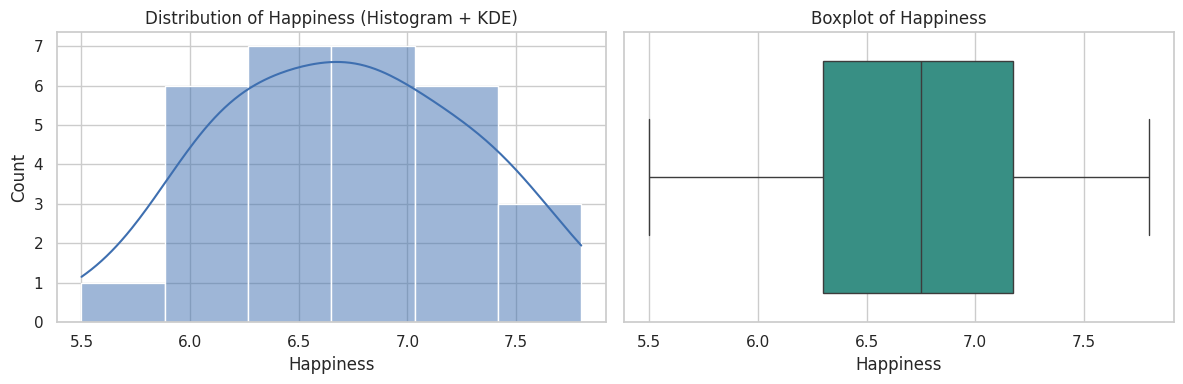

In [12]:
# =====================================================
# 9. DV distribution: histogram + boxplot for Happiness
# =====================================================

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df_eu['Happiness'], kde=True, color="#3E6FB0")
plt.title("Distribution of Happiness (Histogram + KDE)")
plt.xlabel("Happiness")

plt.subplot(1,2,2)
sns.boxplot(x=df_eu['Happiness'], color="#2A9D8F")
plt.title("Boxplot of Happiness")
plt.xlabel("Happiness")

plt.tight_layout()
plt.show()


### 9. Distribution of the dependent variable

For the assignment I need a histogram and a boxplot of the dependent variable.

Here I see that:

- Happiness is continuous and roughly symmetric  
- There are no extreme or implausible outliers  
- Most European countries are between about 6 and 7.8 in average life evaluation  

This supports treating Happiness as a continuous DV in a linear regression model.


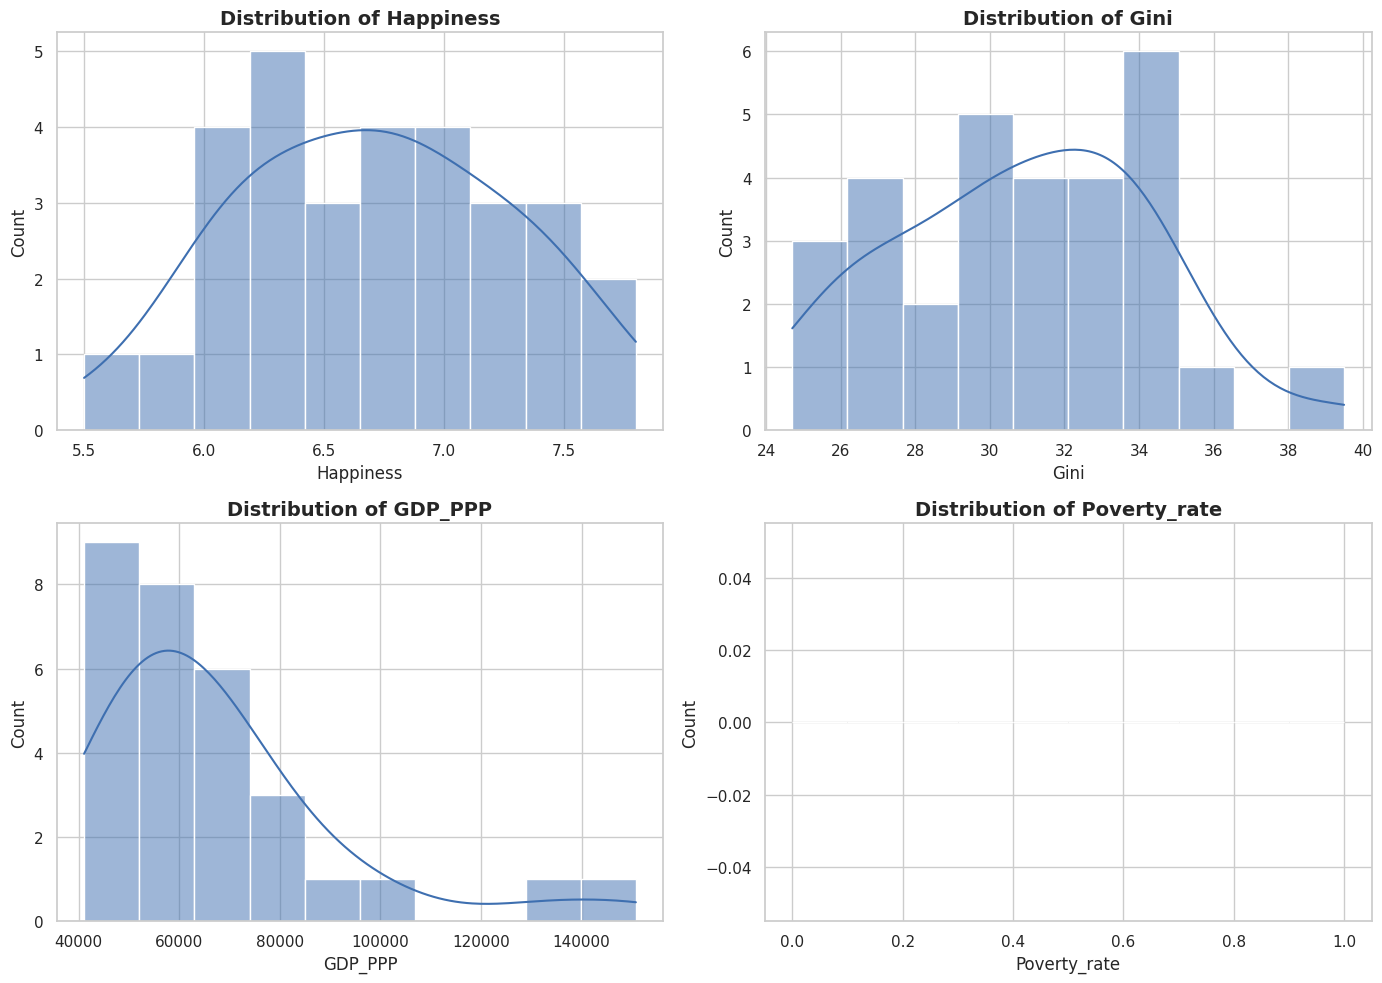

In [13]:
# =====================================================
# 10. Distributions of main variables (histograms + KDE)
# =====================================================

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

variables = {
    "Happiness": (0, 0),
    "Gini": (0, 1),
    "GDP_PPP": (1, 0),
    "Poverty_rate": (1, 1)
}

for var, pos in variables.items():
    ax = axs[pos]
    sns.histplot(df_eu[var], bins=10, kde=True, ax=ax, color="#3E6FB0")
    ax.set_title(f"Distribution of {var}", fontsize=14, fontweight="bold")
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


### 10. Histograms for the main variables

Here I plot histograms (with KDE lines) for:

- Happiness  
- Gini (income inequality)  
- GDP_PPP (GDP per capita, PPP)  
- Poverty_rate  

Observations:

- Gini looks roughly unimodal and not too skewed  
- GDP_PPP is strongly right-skewed (a few very rich countries)  
- Poverty_rate is only available for a few states and also skewed  

This suggests that GDP_PPP might benefit from a log transformation in later models, but for now I keep it in the original scale.


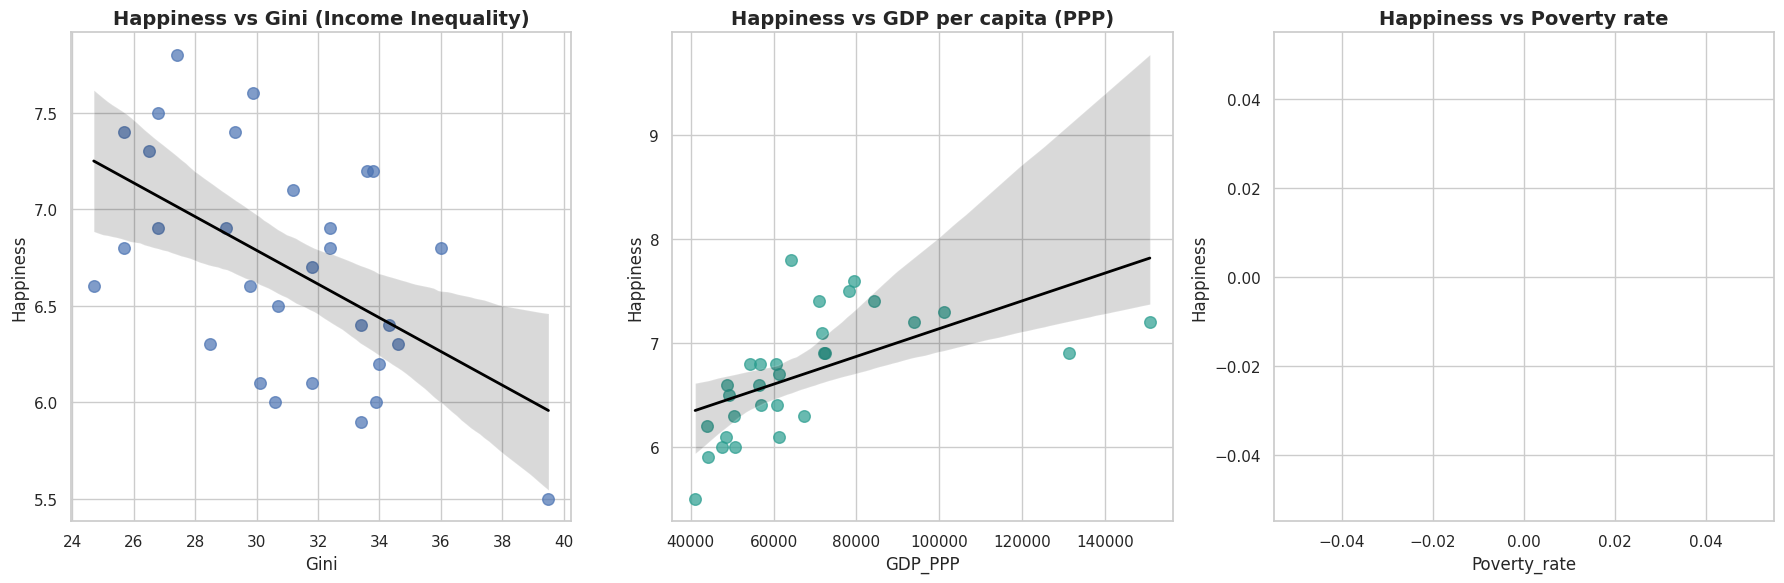

In [14]:
# =====================================================
# 11. Linearity check: scatter plots with regression lines
# =====================================================

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

pairs = [
    ("Gini", "Happiness"),
    ("GDP_PPP", "Happiness"),
    ("Poverty_rate", "Happiness")
]

titles = [
    "Happiness vs Gini (Income Inequality)",
    "Happiness vs GDP per capita (PPP)",
    "Happiness vs Poverty rate"
]

colors = ["#4A72B2", "#2A9D8F", "#D9534F"]

for i, ((x, y), title, color) in enumerate(zip(pairs, titles, colors)):
    ax = axs[i]
    sns.regplot(
        data=df_eu,
        x=x,
        y=y,
        ax=ax,
        scatter_kws={'alpha': 0.7, 's': 70},
        line_kws={'color': 'black', 'linewidth': 2},
        color=color
    )
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel(y, fontsize=12)

plt.tight_layout()
plt.show()


### 11. Linearity check: scatter plots

I plot Happiness against each main independent variable with a regression line:

- **Gini**: clear negative slope → more inequality, lower happiness  
- **GDP_PPP**: clear positive slope → richer countries, higher happiness  
- **Poverty_rate**: data are limited, but the trend looks slightly negative  

These patterns support my theoretical expectations from Homework 2 and suggest that a linear specification is reasonable, especially for Gini and GDP_PPP.


Correlation matrix (IVs):


,Gini,GDP_PPP
Gini,1.00000,-0.18022
GDP_PPP,-0.18022,1.00000


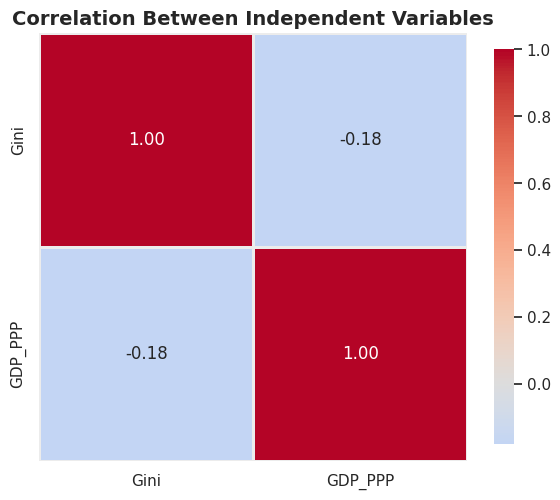

In [15]:
# =====================================================
# 12. Correlation matrix for independent variables
# =====================================================

iv_cols = ['Gini', 'GDP_PPP', 'Income_median', 'Poverty_rate']
iv_cols = [c for c in iv_cols if c in df_eu.columns and df_eu[c].notna().sum() > 0]

corr_iv = df_eu[iv_cols].corr()

print("Correlation matrix (IVs):")
display(corr_iv)

plt.figure(figsize=(6, 6))
sns.heatmap(
    corr_iv,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=2,
    linecolor="#ECECEC",
    square=True,
    cbar_kws={"shrink": 0.7}
)

plt.title("Correlation Between Independent Variables", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


### 12. Correlation between independent variables

The heatmap shows how the independent variables are correlated with each other.

Key points:

- Gini and GDP_PPP are only weakly negatively correlated  
- There are no very high correlations (no pair above ~0.8)  

This means multicollinearity is not a serious problem for my main variables, which is good for regression later.


Correlation matrix (Happiness & IVs):


,Happiness,Gini,GDP_PPP
Happiness,1.000000,-0.533093,0.583799
Gini,-0.533093,1.000000,-0.180220
GDP_PPP,0.583799,-0.180220,1.000000


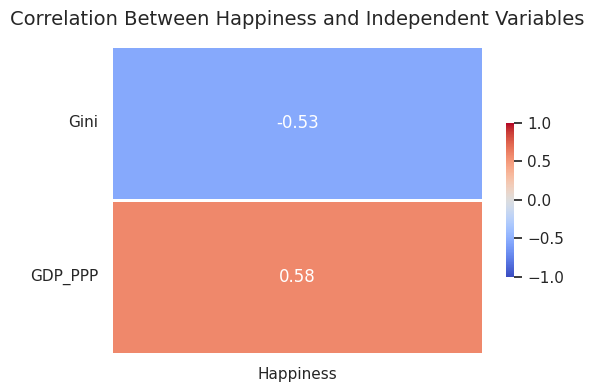

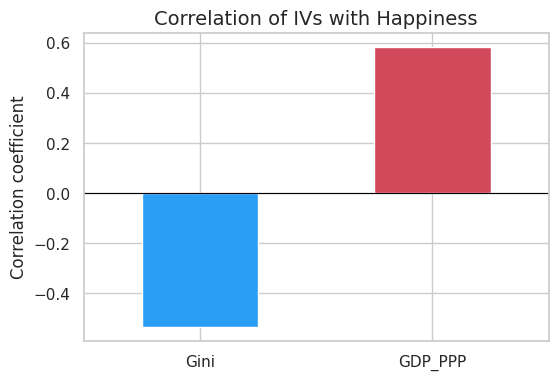

In [16]:
# =====================================================
# 13. Correlation between Happiness and IVs
# =====================================================

corr_dv = df_eu[['Happiness', 'Gini', 'GDP_PPP']].corr()

print("Correlation matrix (Happiness & IVs):")
display(corr_dv)

plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_dv[['Happiness']].loc[['Gini', 'GDP_PPP']],
    annot=True, cmap='coolwarm', vmin=-1, vmax=1,
    fmt=".2f", linewidths=1, linecolor='white',
    cbar_kws={'shrink': 0.5}
)
plt.title("Correlation Between Happiness and Independent Variables", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(6,4))
corr_vals = corr_dv['Happiness'][['Gini', 'GDP_PPP']]
corr_vals.plot(kind='bar', color=['#2a9df4', '#d1495b'])
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Correlation of IVs with Happiness", fontsize=14)
plt.ylabel("Correlation coefficient")
plt.xticks(rotation=0)
plt.show()


### 13. Correlation with Happiness

Here I focus on how Happiness correlates with my key predictors:

- Gini has a negative correlation with Happiness  
- GDP_PPP has a positive correlation with Happiness  

This matches the story from the literature: more inequality is bad for well-being, more income is good (at least up to a point).


### 14. Cleaning and preprocessing plan

Based on the EDA above, my plan is:

- **Missing values:**  
  I keep all countries where Happiness, Gini and GDP_PPP are available.  
  Income_median and Poverty_rate have many missing values, so they are mainly used for descriptive plots, not as core predictors in the main model.

- **Dummy variables:**  
  In this homework I only use numeric variables (Happiness, Gini, GDP_PPP), so I do not need dummy coding yet.  
  In future models I could add categorical variables (for example, welfare regime groups) and then create dummies with one reference category.

- **Outliers:**  
  There are no crazy outliers for Happiness or Gini.  
  Some countries are very rich in GDP_PPP, but these values are real (Luxembourg, Norway etc.), so I keep them.

- **Transformations:**  
  Happiness is already on a 0–10 scale and looks close to normal, so I do not transform it.  
  GDP_PPP is skewed, so in future regression it may be useful to try a log transformation to better capture diminishing returns of income.



===== Regression: Happiness ~ Gini =====


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     11.12
Date:                Thu, 13 Nov 2025   Prob (F-statistic):            0.00242
Time:                        04:12:29   Log-Likelihood:                -20.144
No. Observations:                  30   AIC:                             44.29
Df Residuals:                      28   BIC:                             47.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4044      0.814     11.553      0.000       7.737      11.072
Gini          -0.0872      0.026     -3.334      0.002      -0.141      -0.034
==============================================================================
Omnibus:                        4.702   Durbin-Watson:                   0.499
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                1.793
Skew:                           0.158   Prob(JB):                        0.408
Kurtosis:                       1.845   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

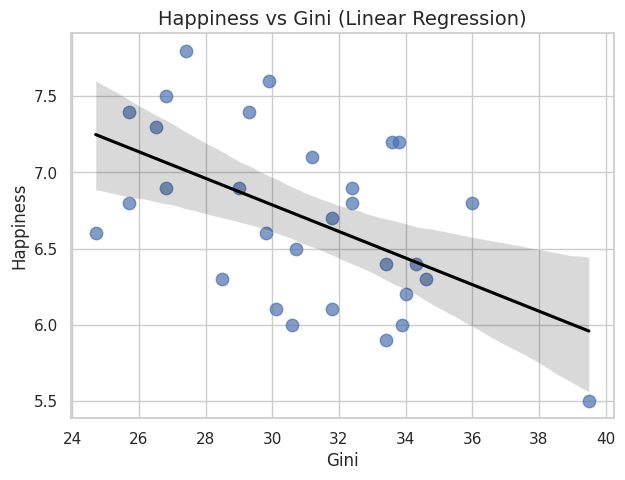


===== Regression: Happiness ~ GDP_PPP =====


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     14.48
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           0.000707
Time:                        04:12:29   Log-Likelihood:                -18.907
No. Observations:                  30   AIC:                             41.81
Df Residuals:                      28   BIC:                             44.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8022      0.253     22.957      0.000       5.285       6.320
GDP_PPP     1.336e-05   3.51e-06      3.805      0.001    6.17e-06    2.06e-05
==============================================================================
Omnibus:                        0.729   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.590
Skew:                           0.323   Prob(JB):                        0.745
Kurtosis:                       2.770   Cond. No.                     2.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

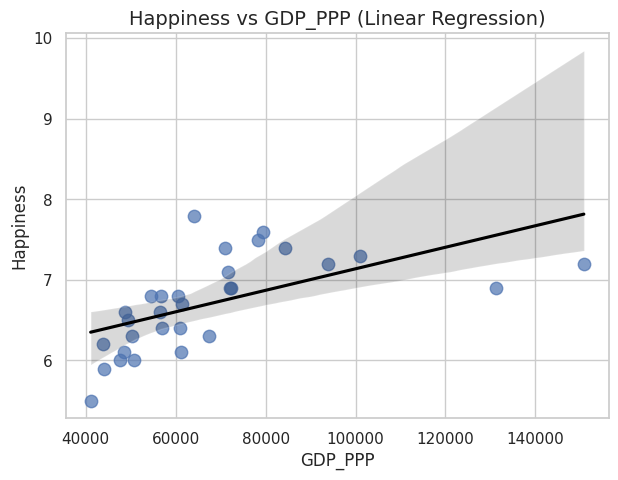

In [17]:
# =====================================================
# 15. Simple linear regressions:
#     Happiness ~ Gini, Happiness ~ GDP_PPP
# =====================================================

def run_regression(df, y_var, x_var):
    X = sm.add_constant(df[x_var])
    y = df[y_var]

    model = sm.OLS(y, X).fit()
    print(f"\n===== Regression: {y_var} ~ {x_var} =====")
    display(model.summary())

    plt.figure(figsize=(7,5))
    sns.regplot(x=df[x_var], y=df[y_var], ci=95,
                scatter_kws={'s':80, 'alpha':0.7},
                line_kws={'color':'black'})
    plt.title(f"{y_var} vs {x_var} (Linear Regression)", fontsize=14)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

    return model

model_gini = run_regression(df_eu, 'Happiness', 'Gini')
model_gdp  = run_regression(df_eu, 'Happiness', 'GDP_PPP')


### 15. Simple linear regression models

I run two OLS regressions:

1. Happiness ~ Gini  
2. Happiness ~ GDP_PPP  

The results show:

- A negative and significant effect of Gini on Happiness  
- A positive and significant effect of GDP_PPP on Happiness  

Each predictor alone explains part of the variation in happiness, which supports my hypotheses from Homework 2.


In [18]:
# =====================================================
# 16. Multiple regression: Happiness ~ Gini + GDP_PPP
# =====================================================

X_multi = df_eu[['Gini', 'GDP_PPP']]
X_multi = sm.add_constant(X_multi)
y_multi = df_eu['Happiness']

model_multi = sm.OLS(y_multi, X_multi).fit()

print("\n===== Multiple Regression: Happiness ~ Gini + GDP_PPP =====")
display(model_multi.summary())



===== Multiple Regression: Happiness ~ Gini + GDP_PPP =====


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     15.23
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           3.74e-05
Time:                        04:12:58   Log-Likelihood:                -13.832
No. Observations:                  30   AIC:                             33.66
Df Residuals:                      27   BIC:                             37.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1637      0.748     10.908      0.000       6.628       9.699
Gini          -0.0724      0.022     -3.297      0.003      -0.117      -0.027
GDP_PPP     1.154e-05   3.07e-06      3.758      0.001    5.24e-06    1.78e-05
==============================================================================
Omnibus:                        1.377   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.304
Skew:                           0.418   Prob(JB):                        0.521
Kurtosis:                       2.413   Cond. No.                     7.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 16. Multiple regression model

Finally, I estimate a model with both main predictors:

> Happiness ~ Gini + GDP_PPP

This model shows the **joint effect** of inequality and income.

- Gini stays negative  
- GDP_PPP stays positive  
- The R² increases compared to the simple models  

This is consistent with the idea that both distribution (inequality) and overall income level matter for subjective well-being.


### 17. Reflection: theory vs data

My EDA mostly supports the theoretical assumptions from Homework 2:

- Higher income inequality (Gini) is linked to lower happiness  
- Higher income level (GDP_PPP) is linked to higher happiness  
- The relationships look roughly linear, and the DV behaves like a continuous variable  
- Multicollinearity between main predictors is low

The only limitation is data availability for median income and poverty rate, which I could not fully include in the main regression.  
Overall, the data fit the theoretical story quite well and give a solid base for further modelling.
